In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [6]:
df=pd.read_csv(r"/content/Banking.csv",delimiter=';')

The dataset appears to be improperly formatted, with all data contained within a single column instead of being split into separate columns. The data seems to be delimited by semicolons (;). I'll reformat the dataset to correctly separate the columns and then analyze it. ​

In [7]:
df.shape

(45211, 17)

In [8]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [12]:
# Select only numeric columns before calculating correlations
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

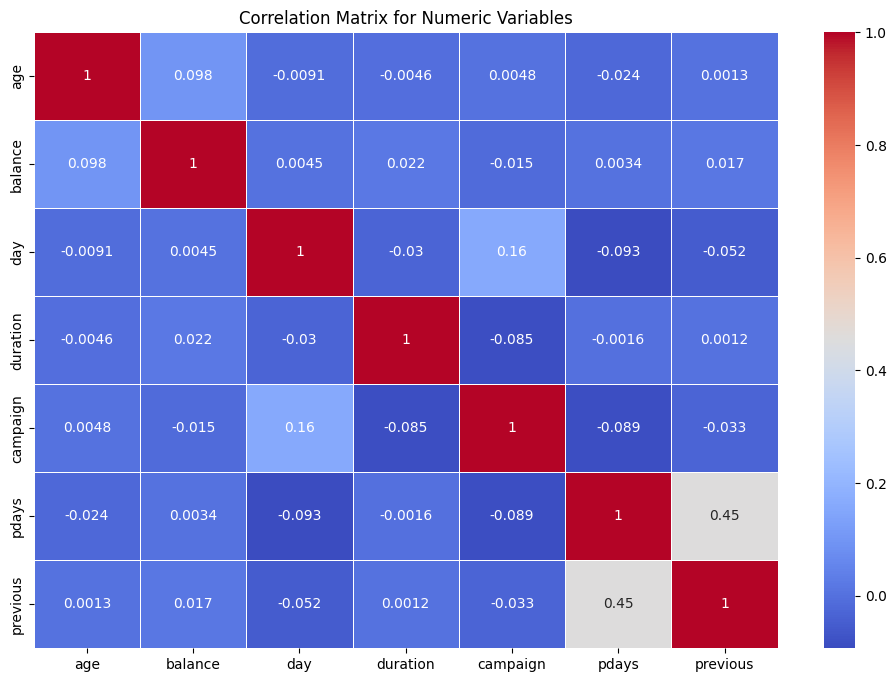

In [13]:
# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix for Numeric Variables')
plt.show()

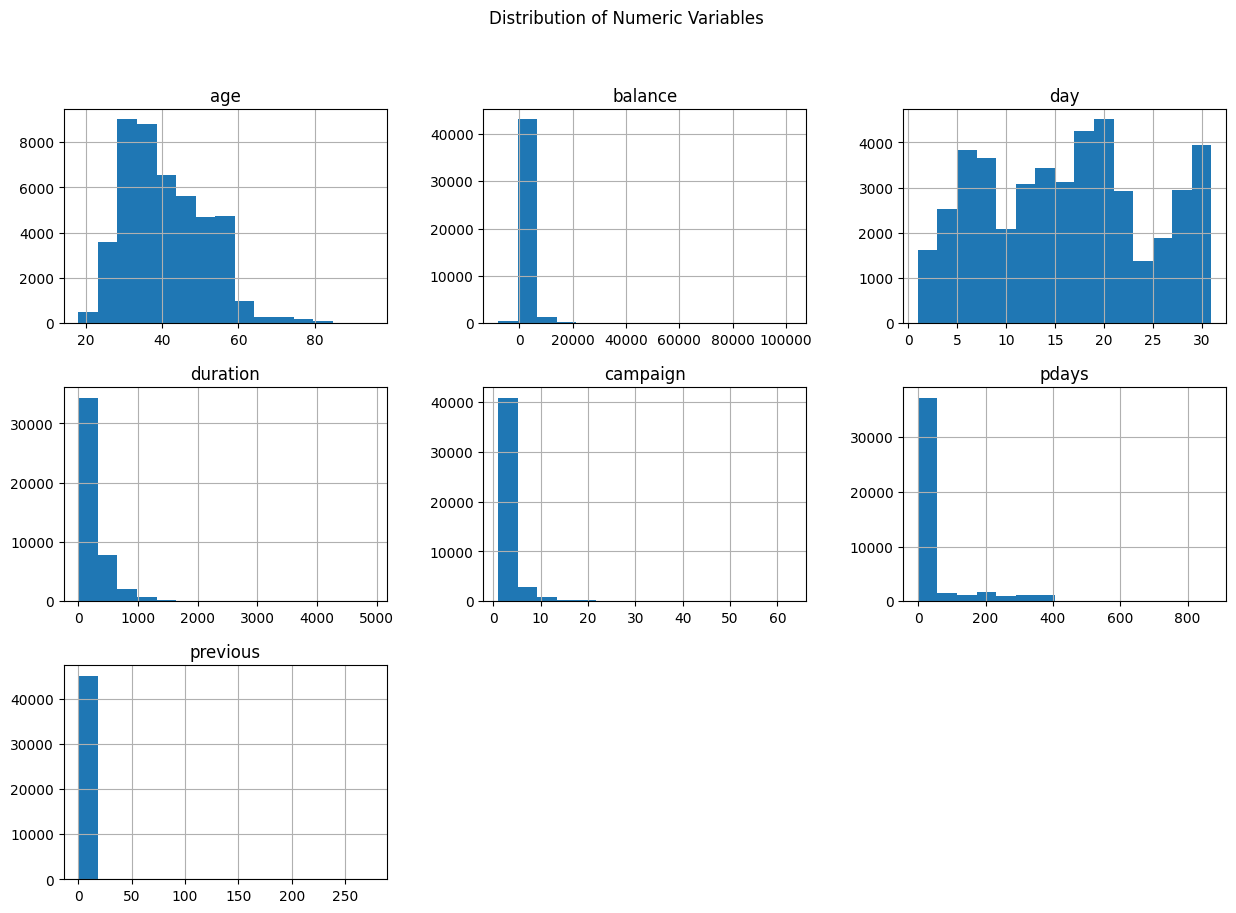

In [14]:
# Distribution of numeric variables
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols].hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.suptitle('Distribution of Numeric Variables')
plt.show()

In [15]:
# Checking for multicollinearity using VIF (Variance Inflation Factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [16]:
# Calculate VIF for each numeric variable
vif_df = pd.DataFrame()
vif_df["feature"] = numeric_cols
vif_df["VIF"] = [variance_inflation_factor(df[numeric_cols].values, i) for i in range(len(numeric_cols))]

In [17]:
# Detecting outliers using Z-score for numeric variables
z_scores = np.abs(stats.zscore(df[numeric_cols]))

In [18]:
# Dataframe with Z-scores
outliers = pd.DataFrame(z_scores, columns=numeric_cols)

In [19]:
# Determine the number of outliers in each column (z-score > 3)
outlier_count = (outliers > 3).sum()

In [22]:
# Assuming 'vif_df' from previous cells holds the VIF data
vif_data = vif_df  # Assign the VIF DataFrame to 'vif_data'

vif_data, outlier_count

(    feature       VIF
 0       age  5.004058
 1   balance  1.212908
 2       day  3.984268
 3  duration  1.901309
 4  campaign  1.824694
 5     pdays  1.454202
 6  previous  1.341641,
 age          381
 balance      745
 day            0
 duration     963
 campaign     840
 pdays       1723
 previous     582
 dtype: int64)

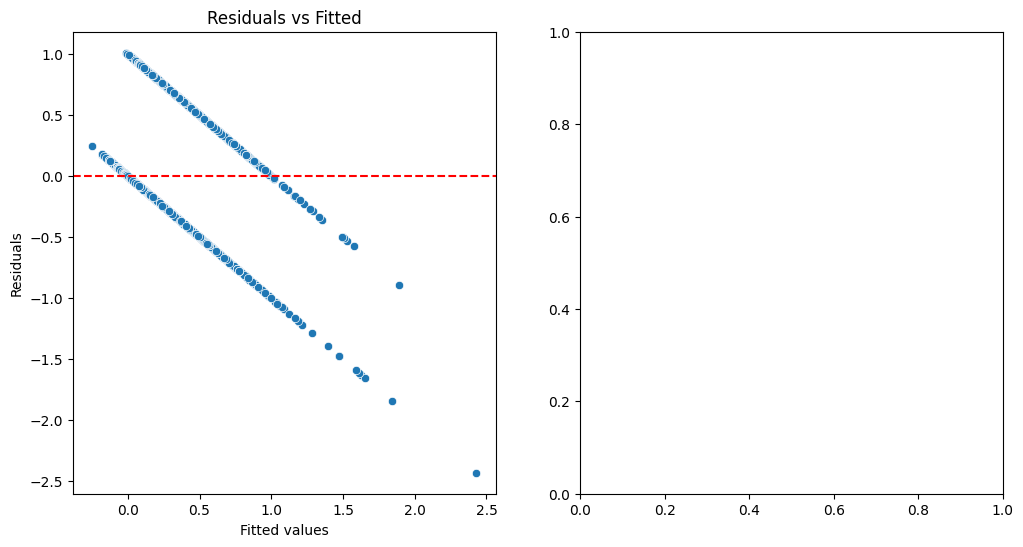

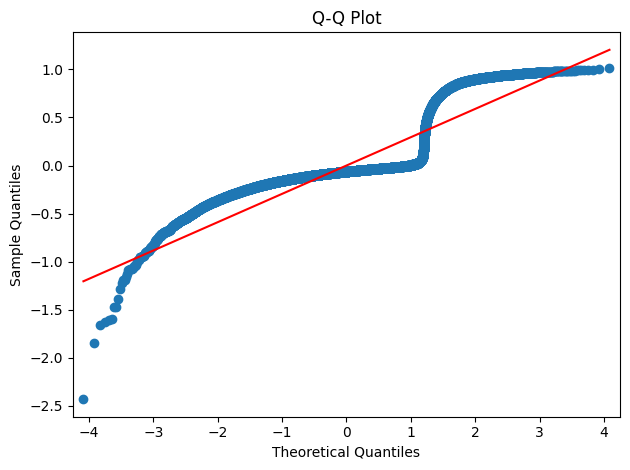

,feature,VIF
0,const,17.835335
1,age,1.009733
2,balance,1.010327
3,duration,1.007663
4,campaign,1.007401


In [24]:
# Residuals vs. Fitted values and Q-Q plot for Simple Linear Regression and Multiple Linear Regression
import statsmodels.api as sm

# Preparing the data for regression analysis
# We will use 'age', 'balance', 'duration', and 'campaign' as predictors for illustration
X = df[['age', 'balance', 'duration', 'campaign']]
y = df['y'].apply(lambda x: 1 if x == 'yes' else 0)  # converting target to binary for logistic regression

# Adding a constant for the intercept term
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Plotting residuals vs fitted values
residuals = model.resid
fitted_values = model.fittedvalues

plt.figure(figsize=(12, 6))

# Residuals vs Fitted
plt.subplot(1, 2, 1)
sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

# Q-Q plot for normality
plt.subplot(1, 2, 2)
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot')

plt.tight_layout()
plt.show()

# Checking multicollinearity using VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

vif_data


#Model building
Regression MODEL


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
# Define the feature matrix X and the target variable y
X = df[['age', 'balance', 'duration', 'campaign']]
y = df['balance']

In [28]:
# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Build the simple linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [30]:
# Predict on the training and testing data
y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

In [31]:
# Evaluate the model: Calculate Mean Squared Error (MSE) and R-squared (R2) for both train and test sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train MSE: {train_mse}, Test MSE: {test_mse}")
print(f"Train R2: {train_r2}, Test R2: {test_r2}")

Train MSE: 4.880168691313387e-25, Test MSE: 5.926822630530127e-25
Train R2: 1.0, Test R2: 1.0


Model building
Classification MODEL

Split the Data
Build a Logistic Regression Model
Evaluate the Model

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [34]:
# Define the feature matrix X and the target variable y
# Example features
X = df[['age', 'balance', 'duration', 'campaign']]
y = df['y'].apply(lambda x: 1 if x == 'yes' else 0)  # Convert target to binary

In [35]:
# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Build the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [55]:
# Predict on the testing data
y_test_pred = logistic_model.predict(X_test)

In [39]:
# Evaluate the model: accuracy, confusion matrix, classification report
accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

accuracy, conf_matrix, class_report

(0.8858785801172178,
 array([[7822,  130],
        [ 902,  189]]),
 '              precision    recall  f1-score   support\n\n           0       0.90      0.98      0.94      7952\n           1       0.59      0.17      0.27      1091\n\n    accuracy                           0.89      9043\n   macro avg       0.74      0.58      0.60      9043\nweighted avg       0.86      0.89      0.86      9043\n')

In [56]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming you want to use Linear Regression
from sklearn.linear_model import LinearRegression

# 1. Create and train the regression model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train) # Assuming you have X_train and y_train defined

# 2. Predict on the testing data
y_pred = regression_model.predict(X_test)

# 3. Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# 4. Calculate R-Squared
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R-Squared: {r2}")

RMSE: 0.2979131082614671
R-Squared: 0.1634283073340479


Evaluating the Model Performance

Regression Models RMSE (Root Mean Squared Error): Measures the average magnitude of the error. It's the square root of the average of squared differences between actual and predicted values. R-Squared Value (R²): Represents the proportion of variance in the dependent variable that is predictable from the independent variables.

In [43]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression # Example model, choose the one you need

# 1. Create and train your classification model (replace with your actual model)
classification_model = LogisticRegression()
classification_model.fit(X_train, y_train)  # Assuming you have X_train and y_train defined

# 2. Predict on the testing data
y_pred = classification_model.predict(X_test)
y_prob = classification_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# 3. Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# 4. AUC-ROC
auc_value = roc_auc_score(y_test, y_prob)
print(f"AUC: {auc_value}")

# 5. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.59      0.17      0.27      1091

    accuracy                           0.89      9043
   macro avg       0.74      0.58      0.60      9043
weighted avg       0.86      0.89      0.86      9043

AUC: 0.8129438293371595


2. Classification Models
Classification Report: Includes precision, recall, F1-score, and support for each class.
AUC-ROC: Area Under the Receiver Operating Characteristic Curve; measures the ability of the model to distinguish between classes.

In [44]:
from sklearn.cluster import KMeans

# Fit the KMeans model:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Inertia value
inertia_value = kmeans.inertia_
print(f"Inertia: {inertia_value}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Inertia: 112640884554.34048


3. Clustering Models
Inertia Value: Measures the sum of squared distances of samples to their closest cluster center. It's used to determine the optimal number of clusters.

In [57]:
import time

start_time = time.time()
predictions = linear_model.predict(X_test)
end_time = time.time()

time_taken = end_time - start_time
print(f"Time taken for predictions: {time_taken} seconds")


Time taken for predictions: 0.0036630630493164062 seconds
